In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
!pip install seaborn --upgrade


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
flight_data = pd.read_csv('flight_dataset_for_notebook.csv')

In [5]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [6]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [7]:
flight_data.describe(include='all')

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683,10683,10683,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
unique,12,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jet Airways,Delhi,Cochin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3849,4537,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,NaN,NaN,NaN,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,NaN,NaN,NaN,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,NaN,NaN,NaN,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,NaN,NaN,NaN,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000


In [8]:
flight_data.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

In [9]:
flight_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')

In [10]:
flight_data_plot_copy = flight_data.copy()

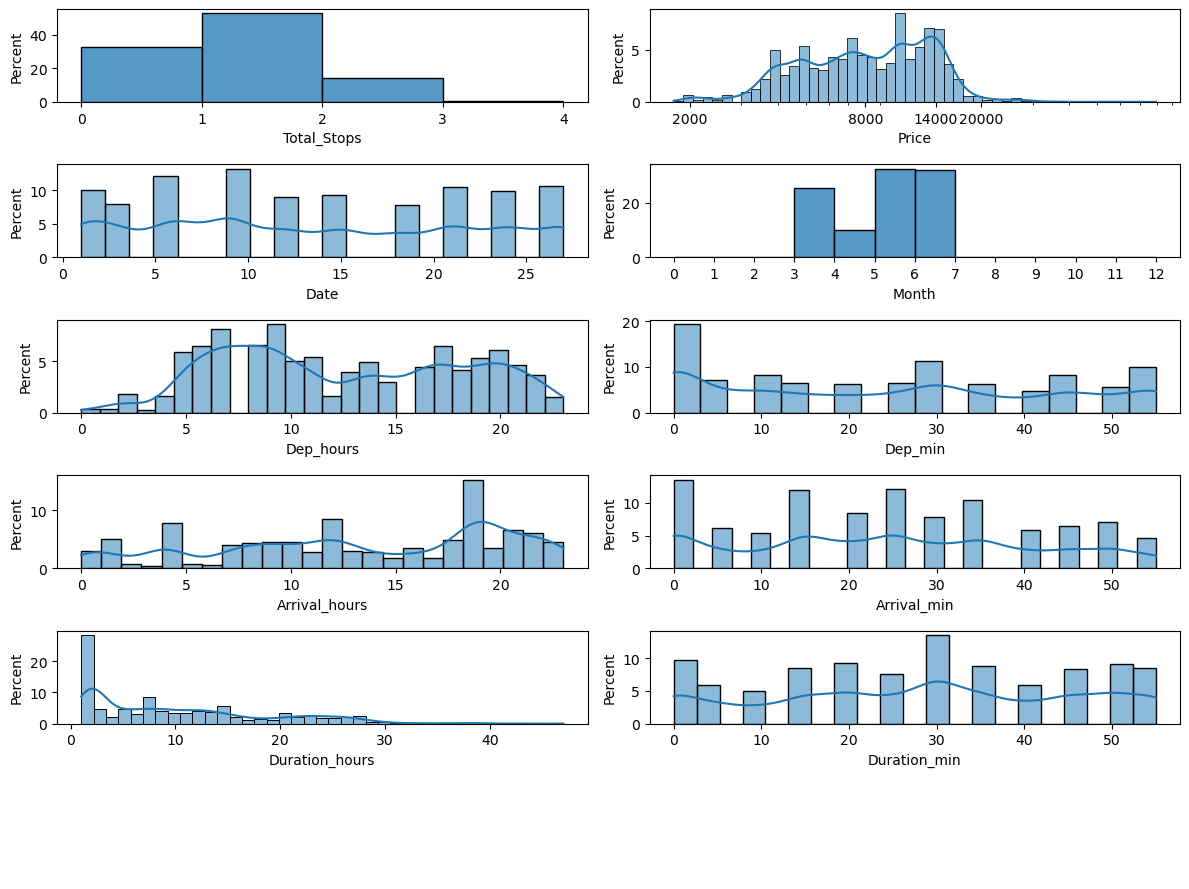

In [11]:
#plot only columns which dtype is not 'Object'
columns_to_plot = [column for column in flight_data_plot_copy.columns if flight_data_plot_copy[column].dtypes != 'O' and column != 'Year']

figure, ax = plt.subplots(6, 2, figsize=(12,9))
ax = ax.flatten()

for i, column in enumerate(columns_to_plot):
    if column == 'Price':
        sns.histplot(flight_data_plot_copy[column], kde=True, stat='percent', ax=ax[i], log_scale=True)
        custom_ticks = np.arange(2000, 26000, 6000) 
        ax[i].set_xticks(custom_ticks)
        ax[i].set_xticklabels([f'{int(label)}' for label in custom_ticks])
    elif column == 'Total_Stops':
        bins = np.arange(0, 5, 1)
        sns.histplot(flight_data_plot_copy[column], kde=False, stat='percent', ax=ax[i], bins=bins)
        ax[i].set_xticks(bins)
        ax[i].set_xticklabels([f'{int(bin)}' for bin in bins])
    elif column == 'Month':
        bins = np.arange(0, 13, 1)
        sns.histplot(flight_data_plot_copy[column], kde=False, stat='percent', ax=ax[i], bins=bins)
        ax[i].set_xticks(bins)
        ax[i].set_xticklabels([f'{int(bin)}' for bin in bins])
    else:
        sns.histplot(flight_data_plot_copy[column], kde=True, stat='percent', ax=ax[i])
    
for i in range(len(columns_to_plot), 12):
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

In [12]:
(flight_data_plot_copy['Price'] >= 50000).sum()

8

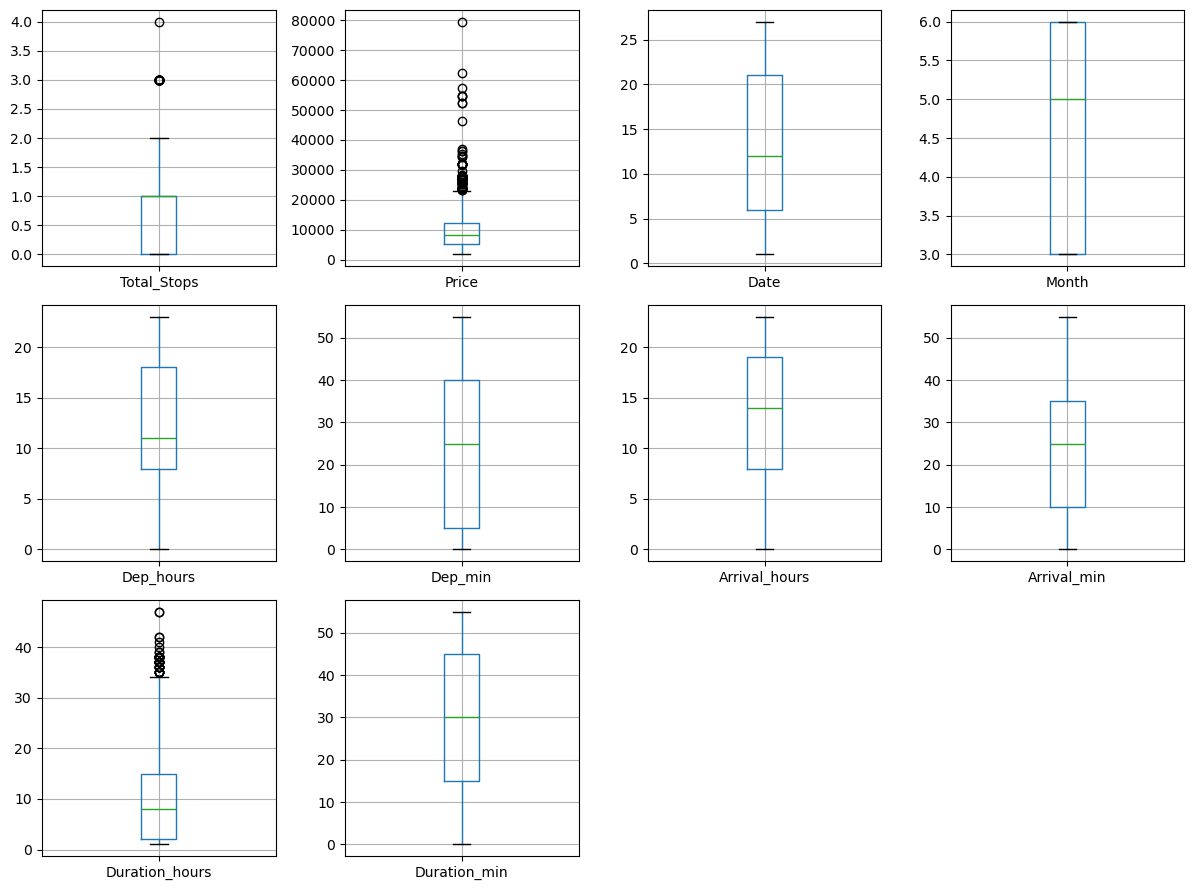

In [13]:
figure, ax = plt.subplots(3, 4, figsize=(12,9))
ax = ax.flatten()

for i, column in enumerate(columns_to_plot):
    flight_data_plot_copy.boxplot(column, ax=ax[i])
    
for i in range(len(columns_to_plot), 12):
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

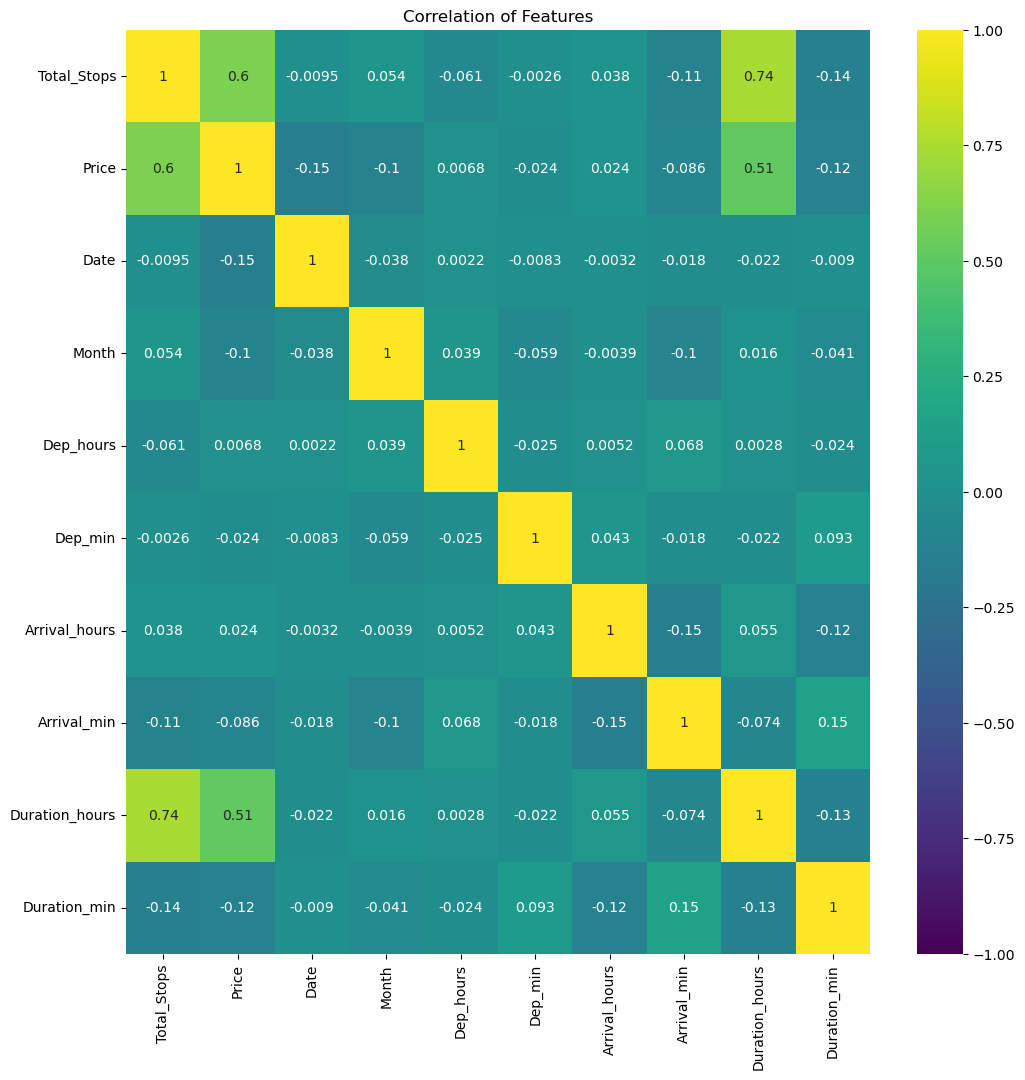

In [14]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', size=12)
ax = sns.heatmap(flight_data_plot_copy[columns_to_plot].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

In [15]:
category_columns = [column for column in flight_data_plot_copy.columns if flight_data_plot_copy[column].dtypes=='O']

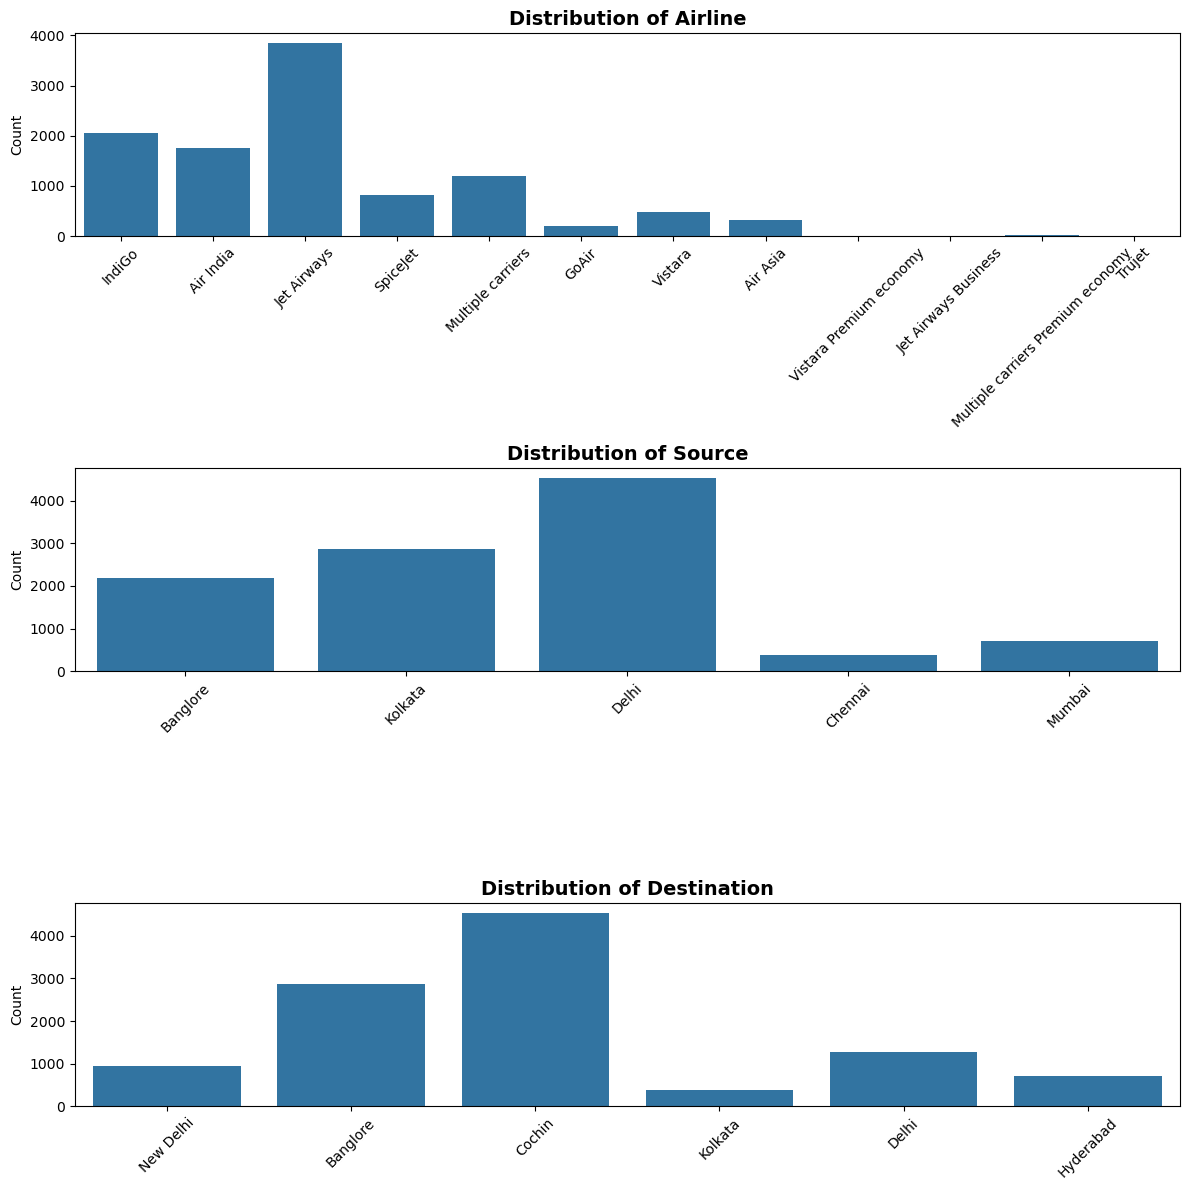

In [16]:
figure, ax = plt.subplots(3, 1, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(category_columns):
    sns.countplot(x=col, data=flight_data_plot_copy, ax=ax[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title(f'Distribution of {col}', fontsize=14, weight='bold')
    ax[i].tick_params(axis='x', rotation=45, labelsize=10)
    ax[i].set_xlabel(None)

plt.tight_layout()
plt.show()

In [17]:
#entire data is from 2019
flight_data_processed = flight_data.drop(columns=['Year'])
value_counts_airline = flight_data_processed['Airline'].value_counts()
value_counts_airline
top_airlines = value_counts_airline.head(8).index.tolist()
top_airlines
flight_data_processed['Airline'] = flight_data_processed['Airline'].apply(lambda x: x if x in top_airlines else 'Others')

In [18]:
flight_data_processed['Airline'].value_counts()

Airline
Jet Airways          3849
IndiGo               2053
Air India            1752
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Others                 23
Name: count, dtype: int64

In [19]:
df_encoded = pd.get_dummies(flight_data_processed['Airline'], prefix='Airline').astype(int)

In [20]:
df_encoded

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara
0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0
10681,0,0,0,0,0,0,0,0,1


In [21]:
flight_data_processed = pd.concat([flight_data_processed, df_encoded], axis=1)
flight_data_processed.drop('Airline', axis=1, inplace=True)

In [22]:
flight_data_processed

,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,...,Duration_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara
0,Banglore,New Delhi,0,3897,24,3,22,20,1,10,...,50,0,0,0,1,0,0,0,0,0
1,Kolkata,Banglore,2,7662,1,5,5,50,13,15,...,25,0,1,0,0,0,0,0,0,0
2,Delhi,Cochin,2,13882,9,6,9,25,4,25,...,0,0,0,0,0,1,0,0,0,0
3,Kolkata,Banglore,1,6218,12,5,18,5,23,30,...,25,0,0,0,1,0,0,0,0,0
4,Banglore,New Delhi,1,13302,1,3,16,50,21,35,...,45,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,0,4107,9,4,19,55,22,25,...,30,1,0,0,0,0,0,0,0,0
10679,Kolkata,Banglore,0,4145,27,4,20,45,23,20,...,35,0,1,0,0,0,0,0,0,0
10680,Banglore,Delhi,0,7229,27,4,8,20,11,20,...,0,0,0,0,0,1,0,0,0,0
10681,Banglore,New Delhi,0,12648,1,3,11,30,14,10,...,40,0,0,0,0,0,0,0,0,1


In [23]:
value_counts_source = flight_data_processed['Source'].value_counts()
value_counts_source
top_source = value_counts_source.index.tolist()
top_source

['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai']

In [24]:
df_encoded = pd.get_dummies(flight_data_processed['Source'], prefix='Source').astype(int)

In [25]:
df_encoded

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [26]:
flight_data_processed = pd.concat([flight_data_processed, df_encoded], axis=1)
flight_data_processed.drop('Source', axis=1, inplace=True)

In [27]:
flight_data_processed

,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,...,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,1,0,0,0,0
1,Banglore,2,7662,1,5,5,50,13,15,7,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,2,13882,9,6,9,25,4,25,19,...,1,0,0,0,0,0,0,1,0,0
3,Banglore,1,6218,12,5,18,5,23,30,5,...,0,0,0,0,0,0,0,0,1,0
4,New Delhi,1,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Banglore,0,4107,9,4,19,55,22,25,2,...,0,0,0,0,0,0,0,0,1,0
10679,Banglore,0,4145,27,4,20,45,23,20,2,...,0,0,0,0,0,0,0,0,1,0
10680,Delhi,0,7229,27,4,8,20,11,20,3,...,1,0,0,0,0,1,0,0,0,0
10681,New Delhi,0,12648,1,3,11,30,14,10,2,...,0,0,0,0,1,1,0,0,0,0


In [28]:
value_counts_destination = flight_data_processed['Destination'].value_counts()
value_counts_destination
top_destination = value_counts_destination.index.tolist()
top_destination

['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata']

In [29]:
df_encoded = pd.get_dummies(flight_data_processed['Destination'], prefix='Destination').astype(int)

In [30]:
df_encoded

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [31]:
flight_data_processed = pd.concat([flight_data_processed, df_encoded], axis=1)
flight_data_processed.drop('Destination', axis=1, inplace=True)

In [32]:
flight_data_processed

,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [33]:
flight_data_processed.drop('Dep_min', axis=1, inplace=True)

In [34]:
flight_data_processed.drop('Arrival_min', axis=1, inplace=True)

In [35]:
flight_data_processed

,Total_Stops,Price,Date,Month,Dep_hours,Arrival_hours,Duration_hours,Duration_min,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,1,2,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,13,7,25,0,1,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,4,19,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,23,5,25,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,21,4,45,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,22,2,30,1,0,...,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,20,23,2,35,0,1,...,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,8,11,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,14,2,40,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
flight_data_processed['Total_Duration_min'] = flight_data_processed['Duration_hours']*24 + flight_data_processed['Duration_min']

In [37]:
flight_data_processed.drop('Duration_hours', axis=1, inplace=True)

In [38]:
flight_data_processed.drop('Duration_min', axis=1, inplace=True)

In [39]:
flight_data_processed

,Total_Stops,Price,Date,Month,Dep_hours,Arrival_hours,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Duration_min
0,0,3897,24,3,22,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,98
1,2,7662,1,5,5,13,0,1,0,0,...,0,1,0,1,0,0,0,0,0,193
2,2,13882,9,6,9,4,0,0,0,0,...,1,0,0,0,1,0,0,0,0,456
3,1,6218,12,5,18,23,0,0,0,1,...,0,1,0,1,0,0,0,0,0,145
4,1,13302,1,3,16,21,0,0,0,1,...,0,0,0,0,0,0,0,0,1,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,22,1,0,0,0,...,0,1,0,1,0,0,0,0,0,78
10679,0,4145,27,4,20,23,0,1,0,0,...,0,1,0,1,0,0,0,0,0,83
10680,0,7229,27,4,8,11,0,0,0,0,...,0,0,0,0,0,1,0,0,0,72
10681,0,12648,1,3,11,14,0,0,0,0,...,0,0,0,0,0,0,0,0,1,88


In [40]:
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour <= 23 or 0 <= hour < 5:
        return 'Night'
    else:
        return 'Invalid Hour'

In [41]:
flight_data_processed['Departure_Time_categorized'] = flight_data_processed['Dep_hours'].apply(categorize_hour)

In [42]:
flight_data_processed['Arrival_Time_categorized'] = flight_data_processed['Arrival_hours'].apply(categorize_hour)

In [43]:
flight_data_processed.drop(columns=['Dep_hours', 'Arrival_hours'], inplace=True, axis=1)

In [44]:
flight_data_processed

,Total_Stops,Price,Date,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Duration_min,Departure_Time_categorized,Arrival_Time_categorized
0,0,3897,24,3,0,0,0,1,0,0,...,0,0,0,0,0,0,1,98,Night,Night
1,2,7662,1,5,0,1,0,0,0,0,...,0,1,0,0,0,0,0,193,Morning,Afternoon
2,2,13882,9,6,0,0,0,0,1,0,...,0,0,1,0,0,0,0,456,Morning,Night
3,1,6218,12,5,0,0,0,1,0,0,...,0,1,0,0,0,0,0,145,Evening,Night
4,1,13302,1,3,0,0,0,1,0,0,...,0,0,0,0,0,0,1,141,Afternoon,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,1,0,0,0,0,0,...,0,1,0,0,0,0,0,78,Evening,Night
10679,0,4145,27,4,0,1,0,0,0,0,...,0,1,0,0,0,0,0,83,Evening,Night
10680,0,7229,27,4,0,0,0,0,1,0,...,0,0,0,1,0,0,0,72,Morning,Morning
10681,0,12648,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,88,Morning,Afternoon


In [45]:
value_counts_dep_time = flight_data_processed['Departure_Time_categorized'].value_counts()
value_counts_dep_time
top_dep_time = value_counts_dep_time.index.tolist()
top_dep_time
df_encoded_dep = pd.get_dummies(flight_data_processed['Departure_Time_categorized'], prefix='Departure_').astype(int)
flight_data_processed = pd.concat([flight_data_processed, df_encoded_dep], axis=1)
flight_data_processed.drop('Departure_Time_categorized', axis=1, inplace=True)

In [46]:
flight_data_processed

,Total_Stops,Price,Date,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Duration_min,Arrival_Time_categorized,Departure__Afternoon,Departure__Evening,Departure__Morning,Departure__Night
0,0,3897,24,3,0,0,0,1,0,0,...,0,0,0,1,98,Night,0,0,0,1
1,2,7662,1,5,0,1,0,0,0,0,...,0,0,0,0,193,Afternoon,0,0,1,0
2,2,13882,9,6,0,0,0,0,1,0,...,0,0,0,0,456,Night,0,0,1,0
3,1,6218,12,5,0,0,0,1,0,0,...,0,0,0,0,145,Night,0,1,0,0
4,1,13302,1,3,0,0,0,1,0,0,...,0,0,0,1,141,Night,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,1,0,0,0,0,0,...,0,0,0,0,78,Night,0,1,0,0
10679,0,4145,27,4,0,1,0,0,0,0,...,0,0,0,0,83,Night,0,1,0,0
10680,0,7229,27,4,0,0,0,0,1,0,...,1,0,0,0,72,Morning,0,0,1,0
10681,0,12648,1,3,0,0,0,0,0,0,...,0,0,0,1,88,Afternoon,0,0,1,0


In [47]:
value_counts_arrival_time = flight_data_processed['Arrival_Time_categorized'].value_counts()
value_counts_arrival_time
top_arrival_time = value_counts_arrival_time.index.tolist()
top_arrival_time
df_encoded_arrival = pd.get_dummies(flight_data_processed['Arrival_Time_categorized'], prefix='Arrival_').astype(int)
flight_data_processed = pd.concat([flight_data_processed, df_encoded_arrival], axis=1)
flight_data_processed.drop('Arrival_Time_categorized', axis=1, inplace=True)

In [48]:
flight_data_processed

,Total_Stops,Price,Date,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Destination_New Delhi,Total_Duration_min,Departure__Afternoon,Departure__Evening,Departure__Morning,Departure__Night,Arrival__Afternoon,Arrival__Evening,Arrival__Morning,Arrival__Night
0,0,3897,24,3,0,0,0,1,0,0,...,1,98,0,0,0,1,0,0,0,1
1,2,7662,1,5,0,1,0,0,0,0,...,0,193,0,0,1,0,1,0,0,0
2,2,13882,9,6,0,0,0,0,1,0,...,0,456,0,0,1,0,0,0,0,1
3,1,6218,12,5,0,0,0,1,0,0,...,0,145,0,1,0,0,0,0,0,1
4,1,13302,1,3,0,0,0,1,0,0,...,1,141,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,1,0,0,0,0,0,...,0,78,0,1,0,0,0,0,0,1
10679,0,4145,27,4,0,1,0,0,0,0,...,0,83,0,1,0,0,0,0,0,1
10680,0,7229,27,4,0,0,0,0,1,0,...,0,72,0,0,1,0,0,0,1,0
10681,0,12648,1,3,0,0,0,0,0,0,...,1,88,0,0,1,0,1,0,0,0


In [49]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

flight_data_processed['Month_Name'] = flight_data_processed['Month'].map(month_mapping)



In [50]:
value_counts_month = flight_data_processed['Month_Name'].value_counts()
value_counts_month
top_month = value_counts_month.index.tolist()
top_month
df_encoded_month = pd.get_dummies(flight_data_processed['Month_Name'], prefix='Month').astype(int)
flight_data_processed = pd.concat([flight_data_processed, df_encoded_month], axis=1)
flight_data_processed.drop('Month_Name', axis=1, inplace=True)


In [51]:
len(flight_data_processed.columns)

37

In [52]:
flight_data_processed

,Total_Stops,Price,Date,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Departure__Morning,Departure__Night,Arrival__Afternoon,Arrival__Evening,Arrival__Morning,Arrival__Night,Month_April,Month_June,Month_March,Month_May
0,0,3897,24,3,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,2,7662,1,5,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,2,13882,9,6,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
3,1,6218,12,5,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,13302,1,3,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
10679,0,4145,27,4,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
10680,0,7229,27,4,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
10681,0,12648,1,3,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [53]:
def calculate_day_of_week(row):
    date = datetime(year=2019, month=row['Month'], day=row['Date'])
    return date.strftime('%A')

In [54]:
from datetime import datetime

In [55]:
# month_mapping = {
#     'Month_April': 4, 'Month_June': 6, 'Month_March': 3, 'Month_May': 5
# }


In [56]:
# flight_data_processed['Month'] = flight_data_processed[
#     ['Month_April', 'Month_June', 'Month_March', 'Month_May']].idxmax(axis=1).map(month_mapping)

In [57]:
flight_data_processed['Day_of_Week'] = flight_data_processed.apply(calculate_day_of_week, axis=1)

In [58]:
flight_data_processed

,Total_Stops,Price,Date,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Departure__Night,Arrival__Afternoon,Arrival__Evening,Arrival__Morning,Arrival__Night,Month_April,Month_June,Month_March,Month_May,Day_of_Week
0,0,3897,24,3,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,Sunday
1,2,7662,1,5,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,Wednesday
2,2,13882,9,6,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,Sunday
3,1,6218,12,5,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,Sunday
4,1,13302,1,3,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Tuesday
10679,0,4145,27,4,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Saturday
10680,0,7229,27,4,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,Saturday
10681,0,12648,1,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,Friday


In [59]:
day_of_week_dummies = pd.get_dummies(flight_data_processed['Day_of_Week'], prefix='Day').astype(int)

In [60]:
flight_data_processed = pd.concat([flight_data_processed, day_of_week_dummies], axis=1)

# Drop the 'Day_of_Week' column if no longer needed
flight_data_processed.drop(columns=['Day_of_Week', 'Date', 'Month'], axis=1, inplace=True)

In [61]:
flight_data_processed

,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,...,Month_June,Month_March,Month_May,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,3897,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,7662,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,13882,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,6218,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,13302,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,0,4145,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10680,0,7229,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10681,0,12648,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [62]:
X = flight_data_processed.drop(columns = ['Price'])
y = flight_data_processed['Price'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 1)

In [64]:
X_test

,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,...,Month_June,Month_March,Month_May,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
7931,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
5468,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
8618,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3836,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7771,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7367,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
10357,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1267,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [65]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scal = standard_scaler.fit_transform(X_train)
X_test_scal = standard_scaler.transform(X_test)

In [66]:
X_train

,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,...,Month_June,Month_March,Month_May,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
8906,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5258,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9477,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1595,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
9972,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7813,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
905,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5192,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [67]:
%%time
model1 = LinearRegression()
model1.fit(X_train, y_train)

CPU times: user 18.3 ms, sys: 4.76 ms, total: 23.1 ms
Wall time: 13.4 ms


LinearRegression()

In [68]:
train_score = model1.score(X_train, y_train)
test_score = model1.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.5929625545006612
Test Score: 0.580916232677041


In [69]:
%%time
model2 = LinearRegression()
model2.fit(X_train_scal, y_train)

CPU times: user 13.8 ms, sys: 200 µs, total: 14 ms
Wall time: 3.82 ms


LinearRegression()

In [70]:
train_score2 = model2.score(X_train_scal, y_train)
test_score2 = model2.score(X_test_scal, y_test)

print("Train Score:", train_score2)
print("Test Score:", test_score2)

Train Score: 0.5926960959718501
Test Score: 0.5803271460046363


In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt



parameters = {
        'learning_rate': np.linspace(0.0001, 0.2, 100),
        'subsample': sp_randFloat(0.8, 0.2),
        'n_estimators': np.arange(100, 2001, 50),
        'max_depth': [2, 3, 4, 5, 6, 7],
        'min_child_weight': [1,2,3,4]
    }

In [72]:
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(),
    n_iter = 10,
    param_distributions = parameters,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=4,
    random_state = 1
)
random_search.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_search.best_estimator_)
print("\n The best score across ALL searched params:\n", random_search.best_score_)
print("\n The best parameters across ALL searched params:\n", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07481010101010102,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

 The best score across ALL searched params:
 0.7365182876586914

 The best parameters across ALL searche

In [73]:
best_model = XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=924, subsample=0.9963414685042283)

In [74]:
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=924, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
train_score2 = best_model.score(X_train, y_train)
test_score2 = best_model.score(X_test, y_test)

print("Train Score:", train_score2)
print("Test Score:", test_score2)

Train Score: 0.8862828016281128
Test Score: 0.7286025285720825


In [76]:
from sklearn.svm import SVR
from scipy.stats import uniform, randint
param_dist = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernels to try
    'C': uniform(0.1, 10),  # Regularization parameter from 0.1 to 10
    'epsilon': uniform(0.01, 0.1),  # Epsilon parameter from 0.01 to 0.1
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6)),  # Gamma values from 0.001 to 100 (log scale)
    'degree': randint(2, 6),  # Degree of polynomial kernel from 2 to 5
    'coef0': uniform(0, 1),  # Coef0 parameter from 0 to 1
}

In [77]:
# random_search = RandomizedSearchCV(
#     estimator=SVR(),
#     param_distributions=param_dist,  # The parameter grid
#     n_iter=10,  # Number of parameter settings that are sampled
#     scoring='r2',  # Evaluation metric
#     cv=5,  # Number of cross-validation folds
#     n_jobs=-1,  # Use all available CPUs
#     verbose=4,  # Print progress
#     random_state=1  # Seed for reproducibility
# )

# random_search.fit(X_train, y_train)

# print(" Results from Random Search " )
# print("\n The best estimator across ALL searched params:\n", random_search.best_estimator_)
# print("\n The best score across ALL searched params:\n", random_search.best_score_)
# print("\n The best parameters across ALL searched params:\n", random_search.best_params_)

In [78]:
from sklearn.tree import DecisionTreeRegressor

values_list = np.linspace(800, 1500, 25).astype(int).tolist()

param_dist = {
    'splitter': ['random'],
    'max_depth': randint(10, 25),  # Random integers from 8 to 14 (inclusive)
    'min_samples_split': randint(15, 50),  # Random integers from 5 to 9 (inclusive)
    'max_features': values_list,  # Include fixed options and list of integers
    'criterion': ['friedman_mse'],  # Criteria for split quality
    'min_samples_leaf': randint(1, 5),  # Random integers from 1 to 4 (inclusive)
    'min_weight_fraction_leaf': uniform(0, 0.001),  # Random floats from 0 to 0.5
    'max_leaf_nodes': randint(100, 250),  # Random integers from 10 to 49 (inclusive)
    'min_impurity_decrease': uniform(0.1, 0.6)  # Random floats from 0 to 0.2
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=param_dist,  # The parameter grid
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='r2',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPUs
    verbose=3,  # Print progress
    random_state=1  # Seed for reproducibility
)

random_search.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_search.best_estimator_)
print("\n The best score across ALL searched params:\n", random_search.best_score_)
print("\n The best parameters across ALL searched params:\n", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 4/5] END learning_rate=0.07481010101010102, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.800022874963469;, score=0.755 total time=   0.5s
[CV 3/5] END learning_rate=0.15153939393939392, max_depth=7, min_child_weight=4, n_estimators=100, subsample=0.8184677189537596;, score=0.734 total time=   0.2s
[CV 1/5] END learning_rate=0.15355858585858584, max_depth=7, min_child_weight=1, n_estimators=400, subsample=0.9871078141612064;, score=0.690 total time=   0.6s
[CV 5/5] END learning_rate=0.15355858585858584, max_depth=7, min_child_weight=1, n_estimators=400, subsample=0.9871078141612064;, score=0.646 total time=   0.6s
[CV 4/5] END learning_rate=0.040483838383838386, max_depth=7, min_child_weight=3, n_estimators=1100, subsample=0.8408904499463036;, score=0.701 total time=   1.6s
[CV 4/5] END learning_rate=0.05663737373737374, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.8834609604734255;, s

[CV 2/5] END criterion=friedman_mse, max_depth=11, max_features=858, max_leaf_nodes=203, min_impurity_decrease=0.13844039790293036, min_samples_leaf=3, min_samples_split=47, min_weight_fraction_leaf=0.0009418369487534225, splitter=random;, score=0.646 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=11, max_features=858, max_leaf_nodes=203, min_impurity_decrease=0.13844039790293036, min_samples_leaf=3, min_samples_split=47, min_weight_fraction_leaf=0.0009418369487534225, splitter=random;, score=0.622 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=16, max_features=1179, max_leaf_nodes=243, min_impurity_decrease=0.65381472132789, min_samples_leaf=2, min_samples_split=17, min_weight_fraction_leaf=0.0001242709619721647, splitter=random;, score=0.732 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=16, max_features=1179, max_leaf_nodes=243, min_impurity_decrease=0.65381472132789, min_samples_leaf=2, min_samples_split=17, min_weight_fracti

[CV 3/5] END criterion=friedman_mse, max_depth=24, max_features=800, max_leaf_nodes=184, min_impurity_decrease=0.6272991906471064, min_samples_leaf=1, min_samples_split=37, min_weight_fraction_leaf=0.0009053923187086493, splitter=random;, score=0.658 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=24, max_features=800, max_leaf_nodes=184, min_impurity_decrease=0.6272991906471064, min_samples_leaf=1, min_samples_split=37, min_weight_fraction_leaf=0.0009053923187086493, splitter=random;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=24, max_features=800, max_leaf_nodes=184, min_impurity_decrease=0.6272991906471064, min_samples_leaf=1, min_samples_split=37, min_weight_fraction_leaf=0.0009053923187086493, splitter=random;, score=0.623 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=13, max_features=975, max_leaf_nodes=240, min_impurity_decrease=0.30777310937018804, min_samples_leaf=4, min_samples_split=21, min_weight_fract

[CV 3/5] END criterion=friedman_mse, max_depth=20, max_features=975, max_leaf_nodes=236, min_impurity_decrease=0.6817387062239435, min_samples_leaf=2, min_samples_split=22, min_weight_fraction_leaf=0.00031375538004241353, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=20, max_features=975, max_leaf_nodes=236, min_impurity_decrease=0.6817387062239435, min_samples_leaf=2, min_samples_split=22, min_weight_fraction_leaf=0.00031375538004241353, splitter=random;, score=0.721 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=20, max_features=975, max_leaf_nodes=236, min_impurity_decrease=0.6817387062239435, min_samples_leaf=2, min_samples_split=22, min_weight_fraction_leaf=0.00031375538004241353, splitter=random;, score=0.633 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=19, max_features=1208, max_leaf_nodes=133, min_impurity_decrease=0.30717847695464895, min_samples_leaf=2, min_samples_split=45, min_weight_f

 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=22, max_features=1208,
                      max_leaf_nodes=208,
                      min_impurity_decrease=0.2825264956126924,
                      min_samples_leaf=2, min_samples_split=20,
                      min_weight_fraction_leaf=9.357709581748076e-05,
                      splitter='random')

 The best score across ALL searched params:
 0.7002320840996786

 The best parameters across ALL searched params:
 {'criterion': 'friedman_mse', 'max_depth': 22, 'max_features': 1208, 'max_leaf_nodes': 208, 'min_impurity_decrease': 0.2825264956126924, 'min_samples_leaf': 2, 'min_samples_split': 20, 'min_weight_fraction_leaf': 9.357709581748076e-05, 'splitter': 'random'}


In [79]:
def plot_residuals(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_train_pred), max(y_train))
    p2 = min(min(y_train_pred), min(y_train))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title('Training Plot')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p3 = max(max(y_test_pred), max(y_test))
    p4 = min(min(y_test_pred), min(y_test))
    plt.plot([p3, p4], [p3, p4], 'b-')
    plt.title('Test Plot')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

In [80]:
model = DecisionTreeRegressor(
    criterion='friedman_mse',
    max_depth=20,
    max_features=975,
    max_leaf_nodes=236,
    min_impurity_decrease=0.6817387062239435,
    min_samples_leaf=2,
    min_samples_split=22,
    min_weight_fraction_leaf=0.00031375538004241353,
    splitter='random'
)

In [81]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20, max_features=975,
                      max_leaf_nodes=236,
                      min_impurity_decrease=0.6817387062239435,
                      min_samples_leaf=2, min_samples_split=22,
                      min_weight_fraction_leaf=0.00031375538004241353,
                      splitter='random')

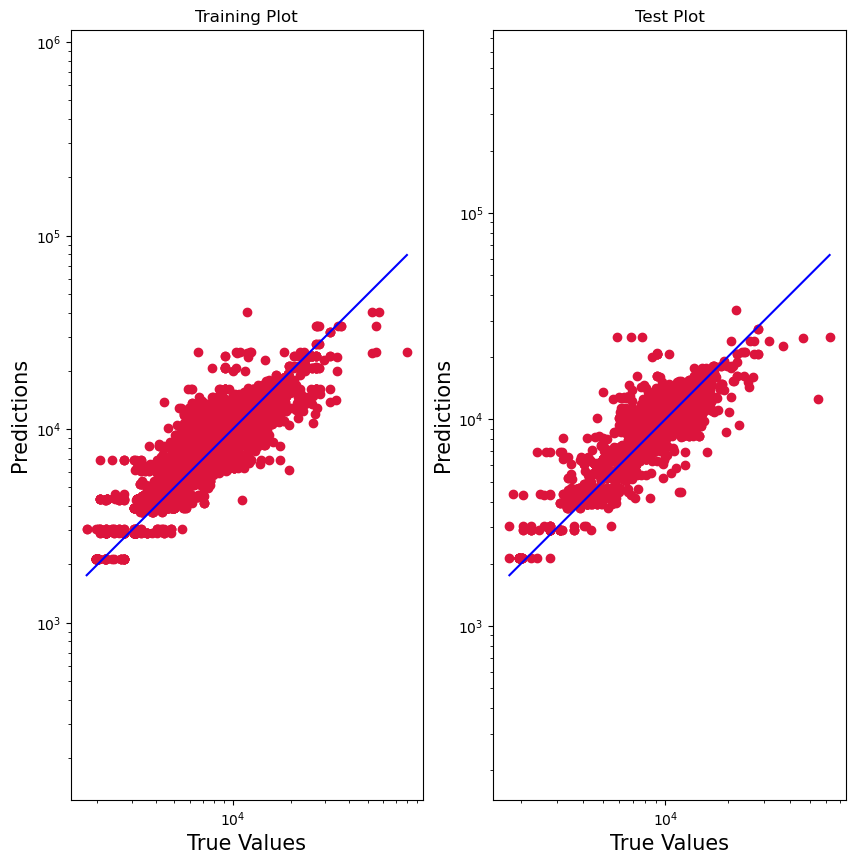

In [82]:
plot_residuals(model, X_train, X_test, y_train, y_test)

In [84]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


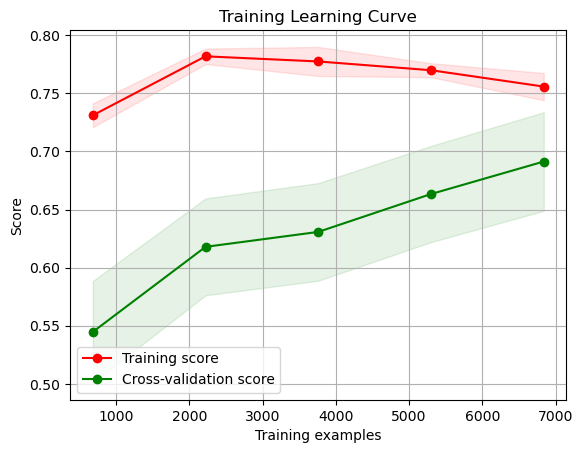

In [89]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(model, X_train, y_train)
plt.title('Training Learning Curve')

plt.show()

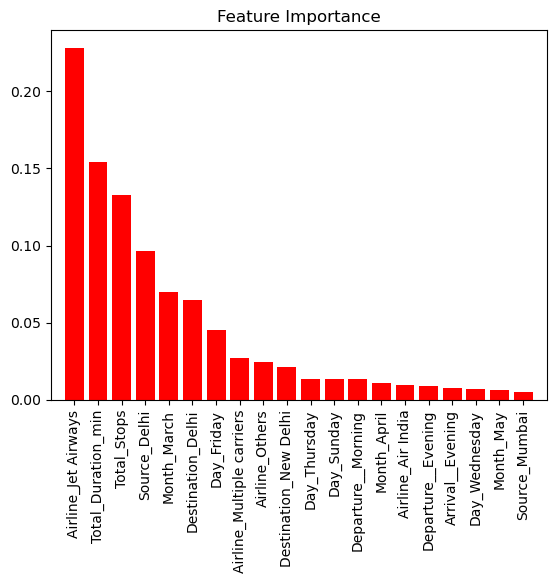

In [94]:
skplt.estimators.plot_feature_importances(
     model, feature_names=X_train.columns, x_tick_rotation=90)
plt.show()

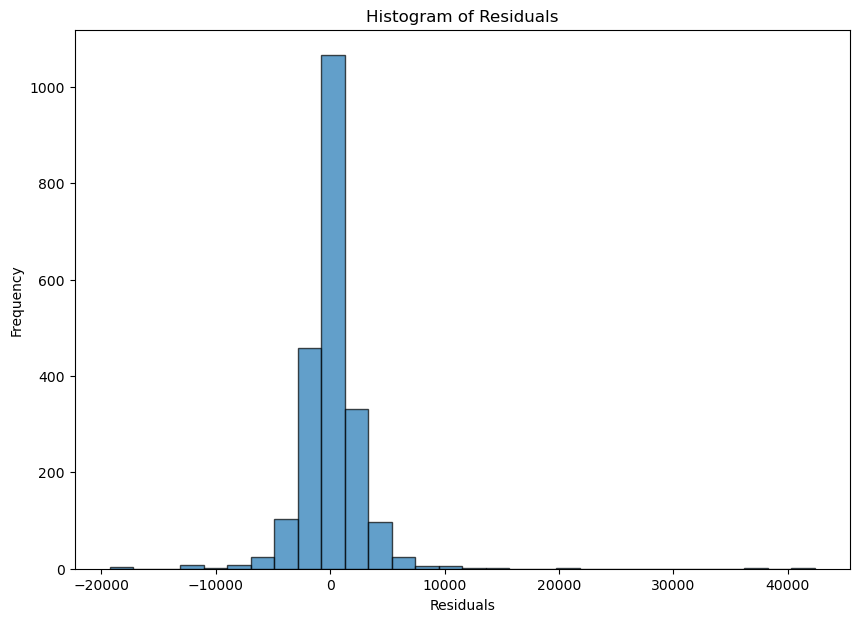

In [101]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 7))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

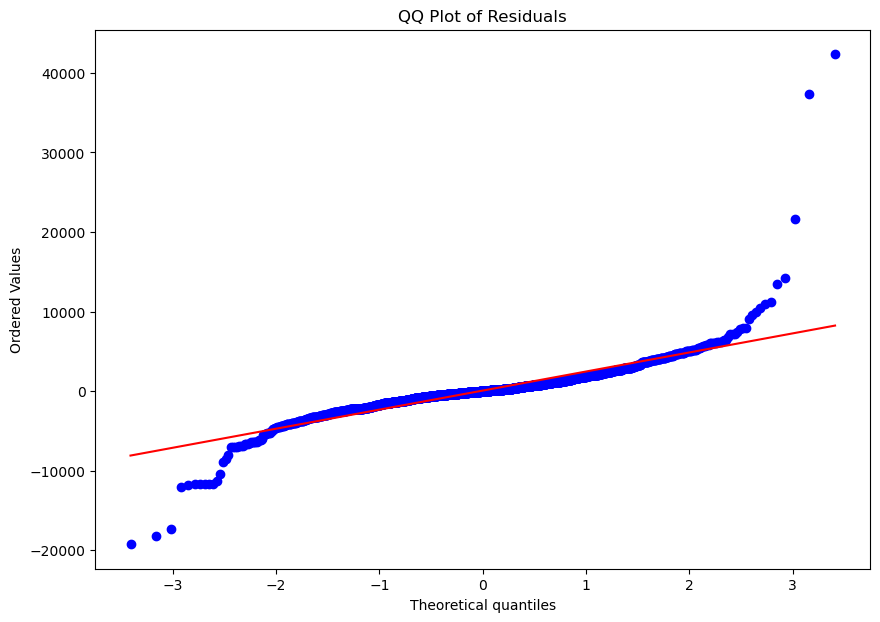

In [103]:
import scipy.stats as stats


y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

In [114]:
X


,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,...,Month_June,Month_March,Month_May,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10680,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


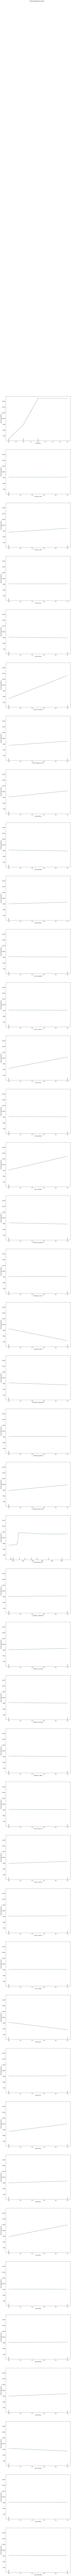

In [127]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
# Determine the number of features
num_features = len(X.columns)

# Create a figure with a vertical layout for each subplot
fig, ax = plt.subplots(nrows=num_features, ncols=1, figsize=(12, 10 * num_features))

# Plot Partial Dependence using the from_estimator method
display = PartialDependenceDisplay.from_estimator(
    model,                 # The trained model
    X,                     # Feature dataset
    features=range(X.shape[1]),  # Features to plot (all features)
    feature_names=X.columns,  # Names of the features
    ax=ax                  # Pass axes to the display
)

# Adjust the layout and title for the figure

plt.suptitle('Partial Dependence Plots', y=1.02)

# Display the plot
plt.show()

In [130]:
flight_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')

In [131]:
flight_data_plot_copy.columns


Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')

In [132]:
flight_data


,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40
